Первые 5 строк датафрейма:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1      

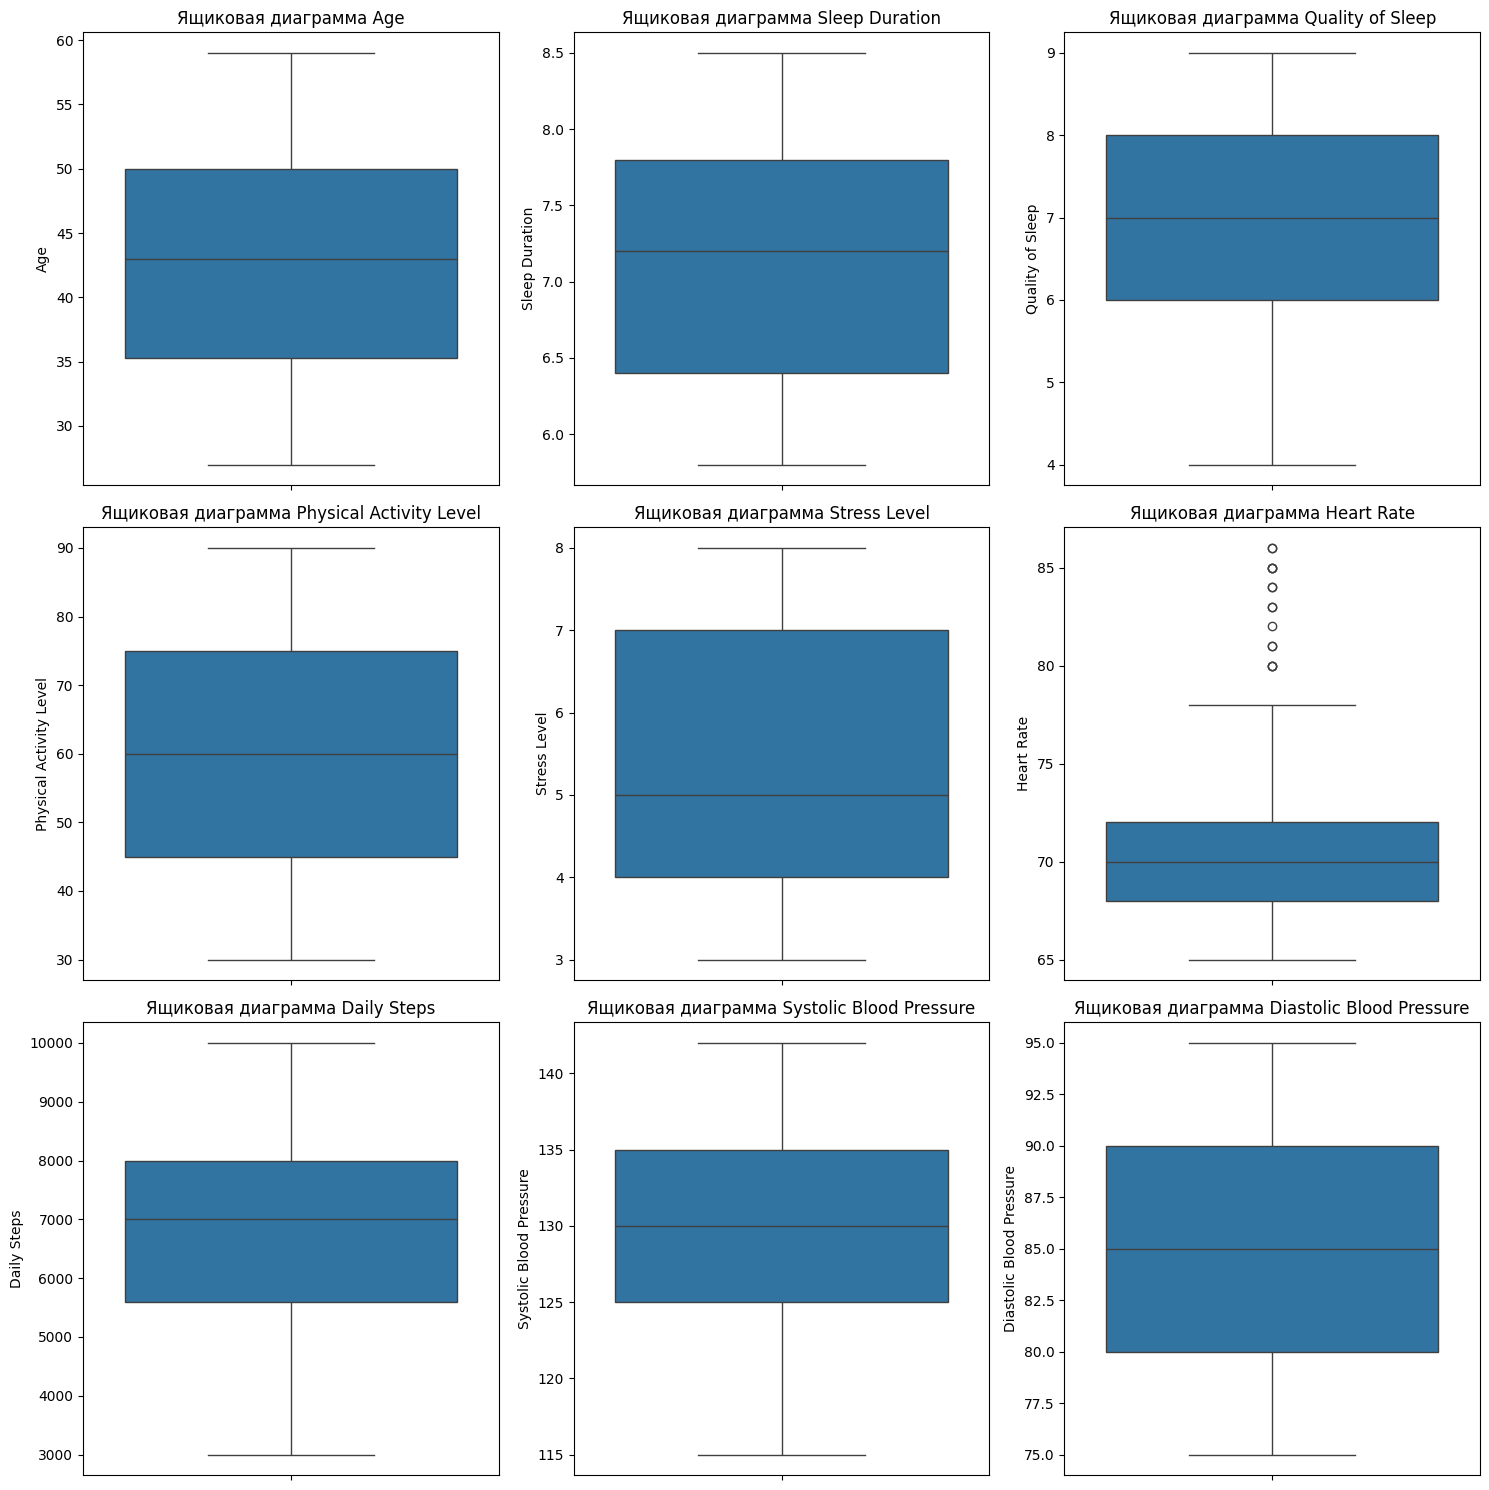

Описательная статистика для числовых столбцов:
        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  \
count               374.000000    374.000000  374.000000    374.000000   
mean                 59.171123      5.385027   70.165775   6816.844920   
std                  20.830804      1.774526    4.135676   1617.915679   
min                  30.000000      3.000000   65.000

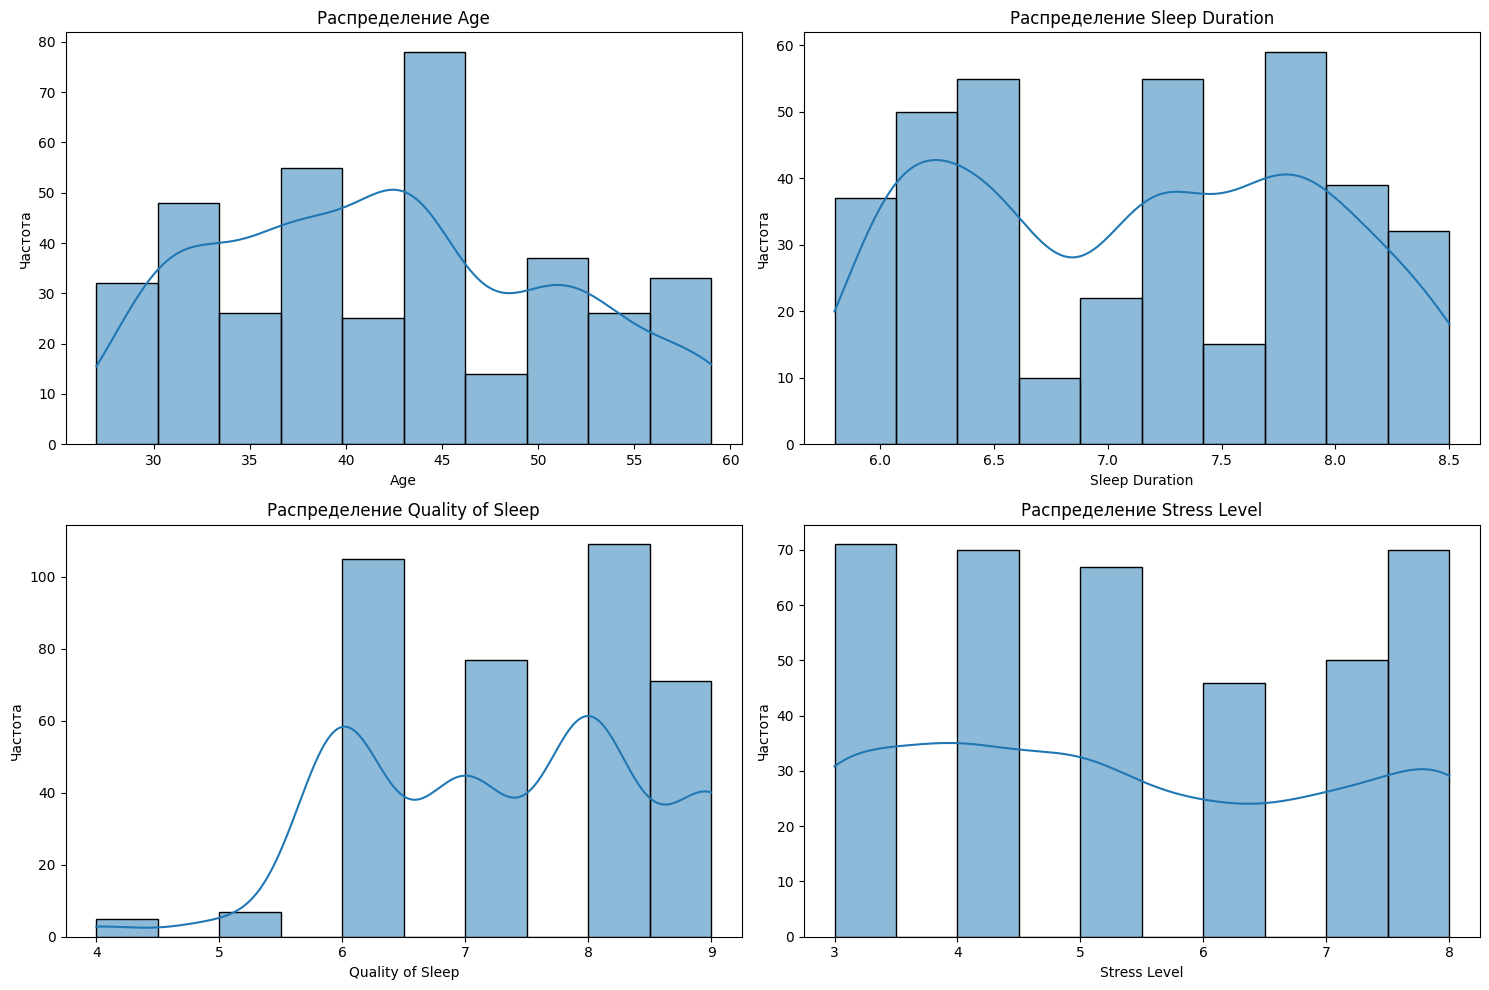

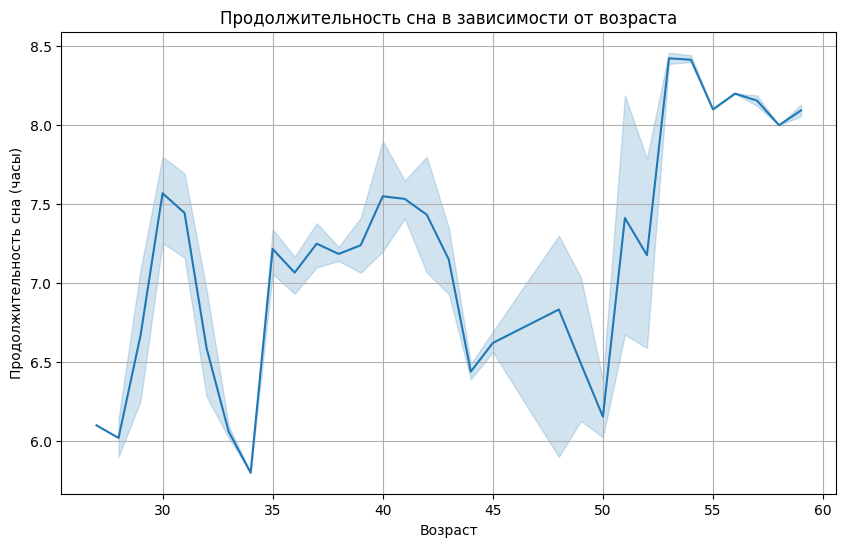

/tmp/ipython-input-1202866244.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-1202866244.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-1202866244.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-1202866244.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set 

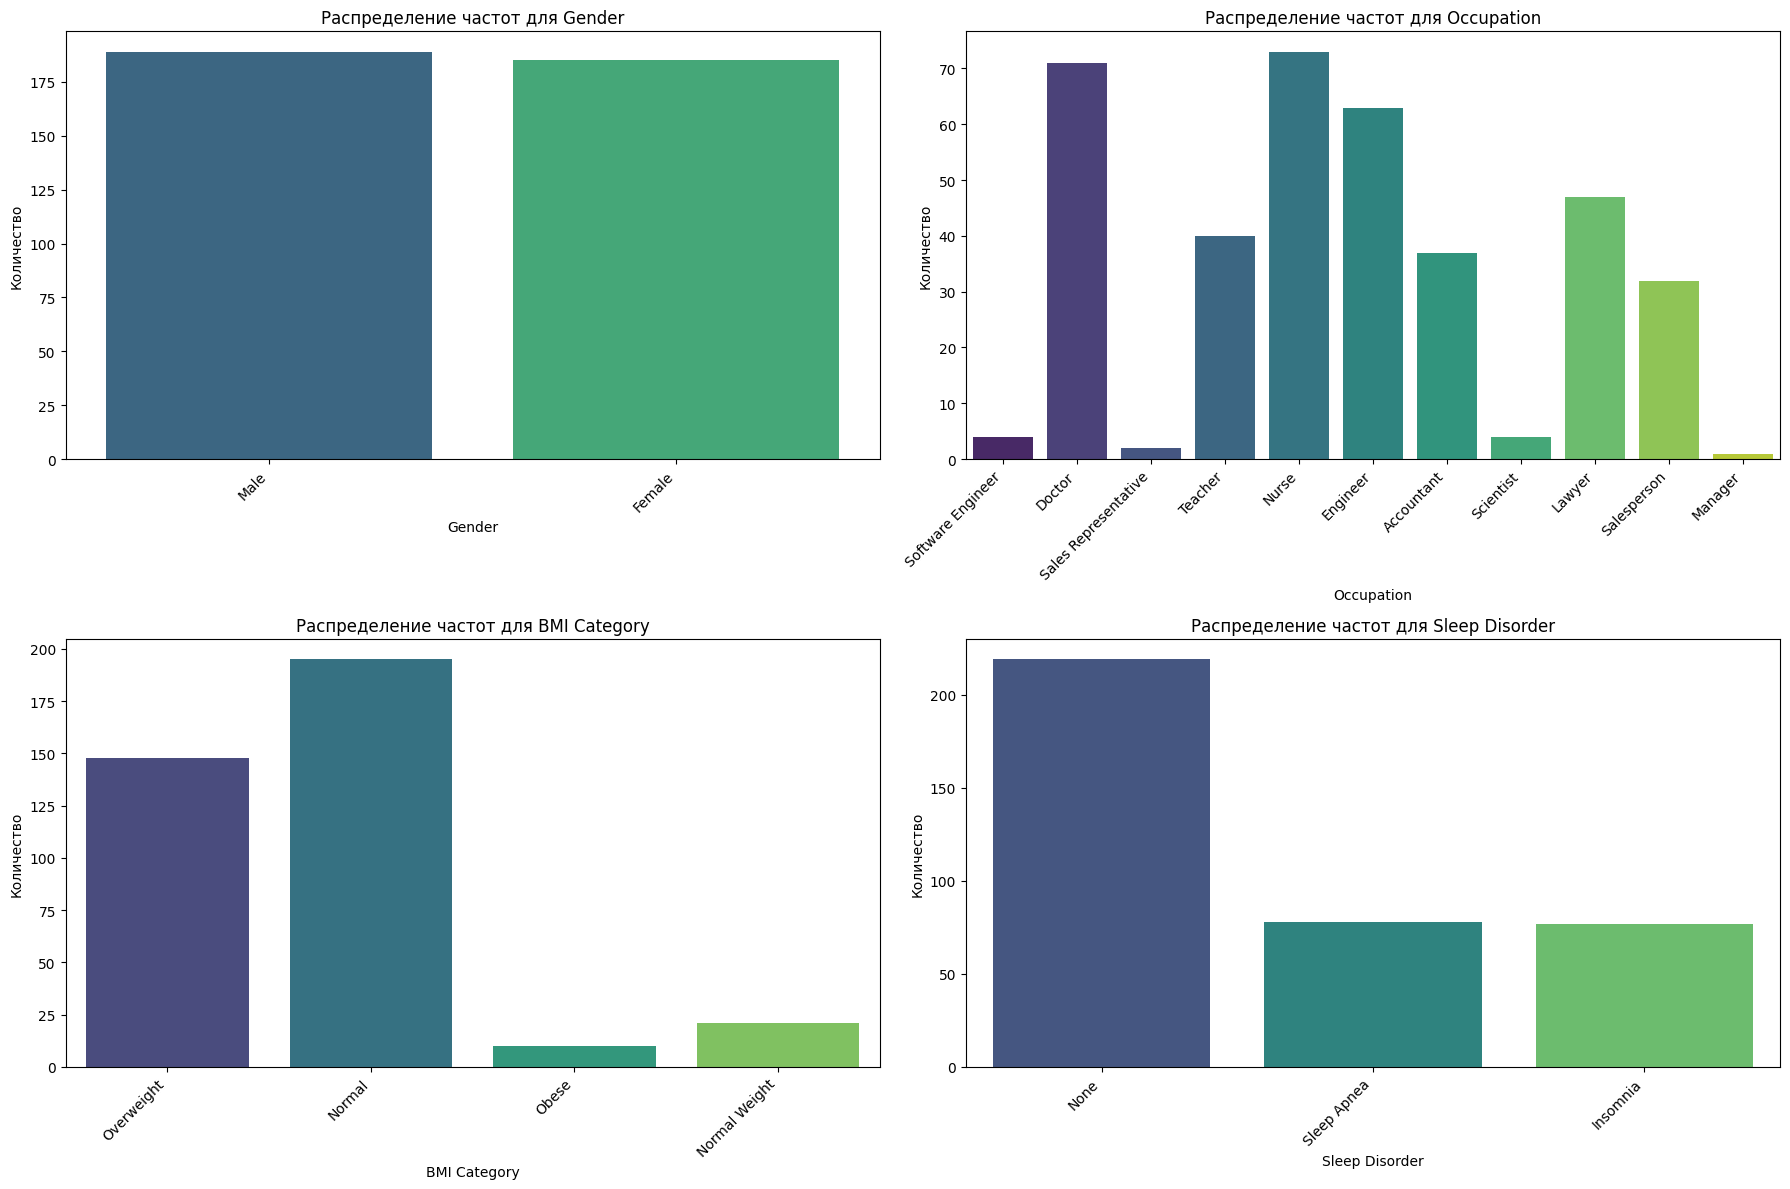

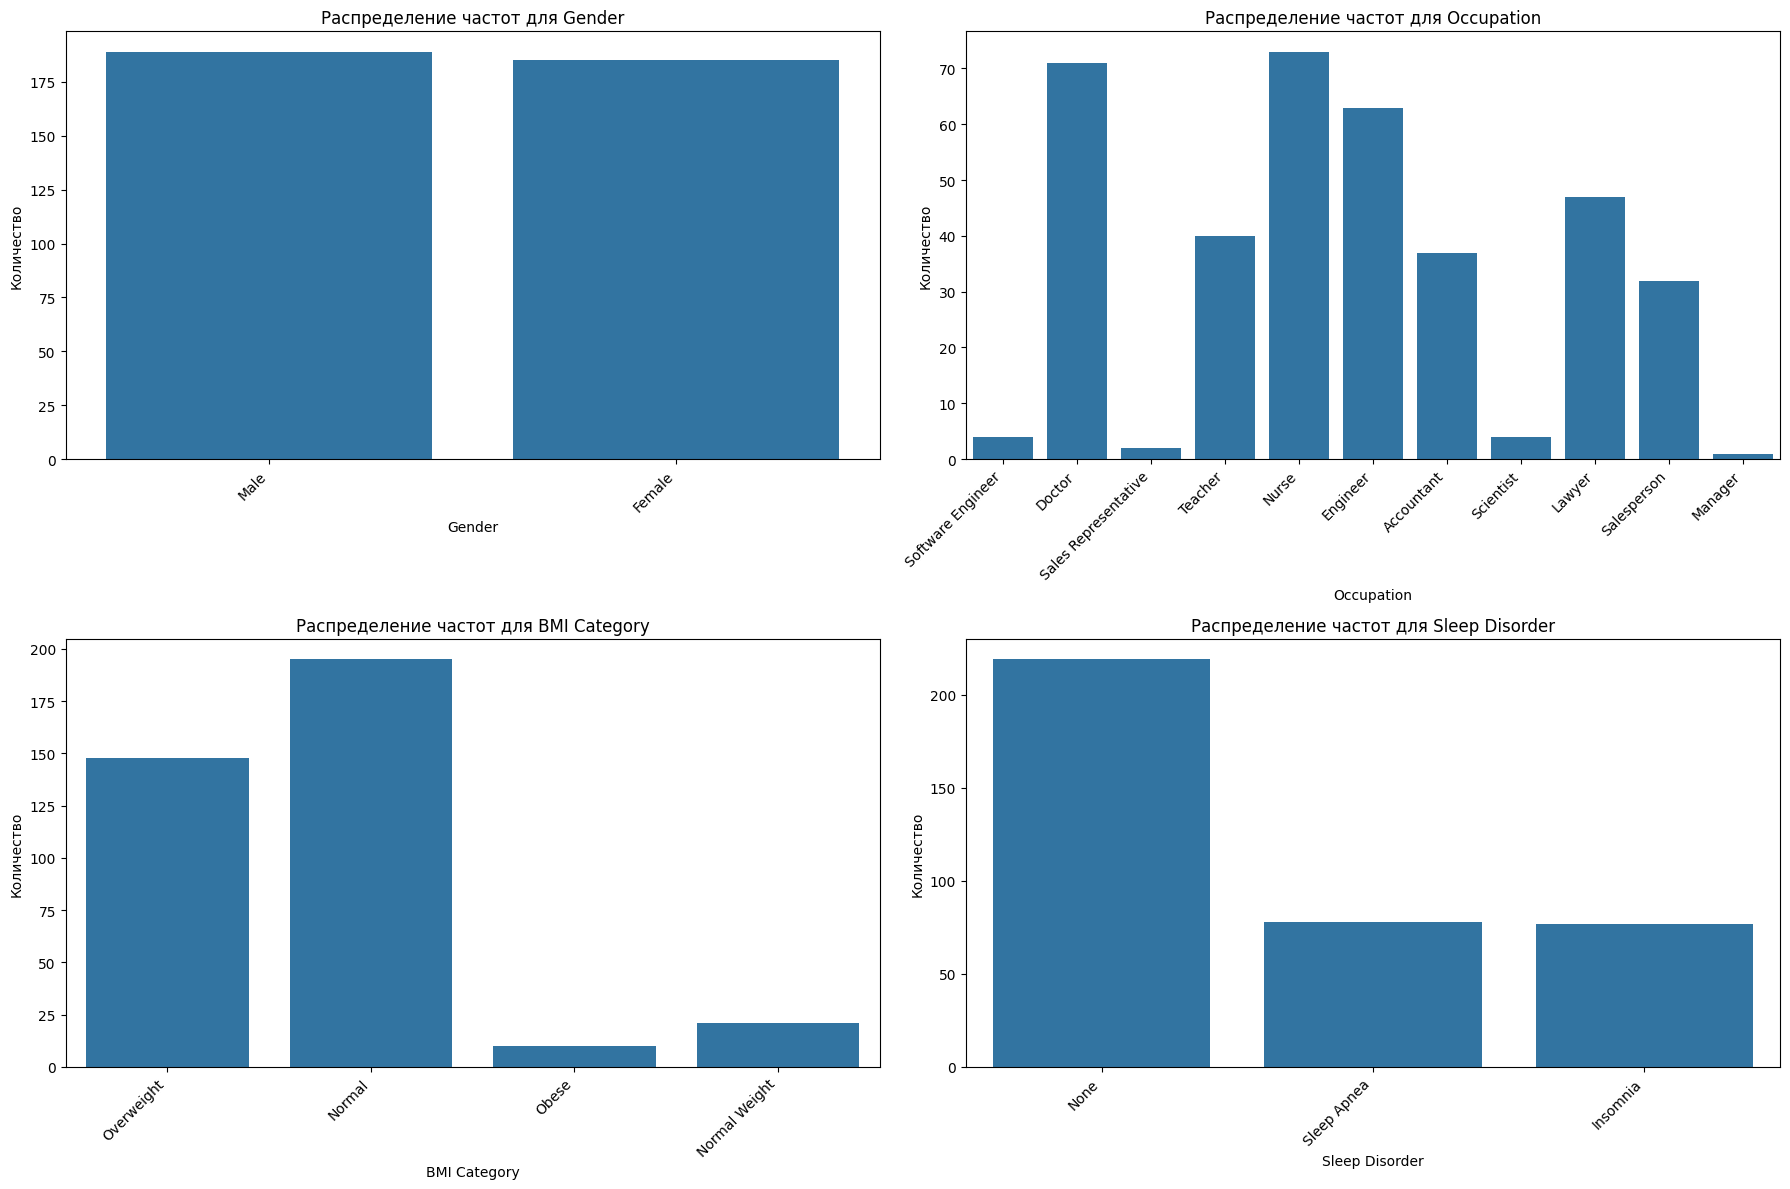

/tmp/ipython-input-1202866244.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Occupation', y='Sleep Duration', palette='viridis')
/tmp/ipython-input-1202866244.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='BMI Category', y='Quality of Sleep', palette='viridis')


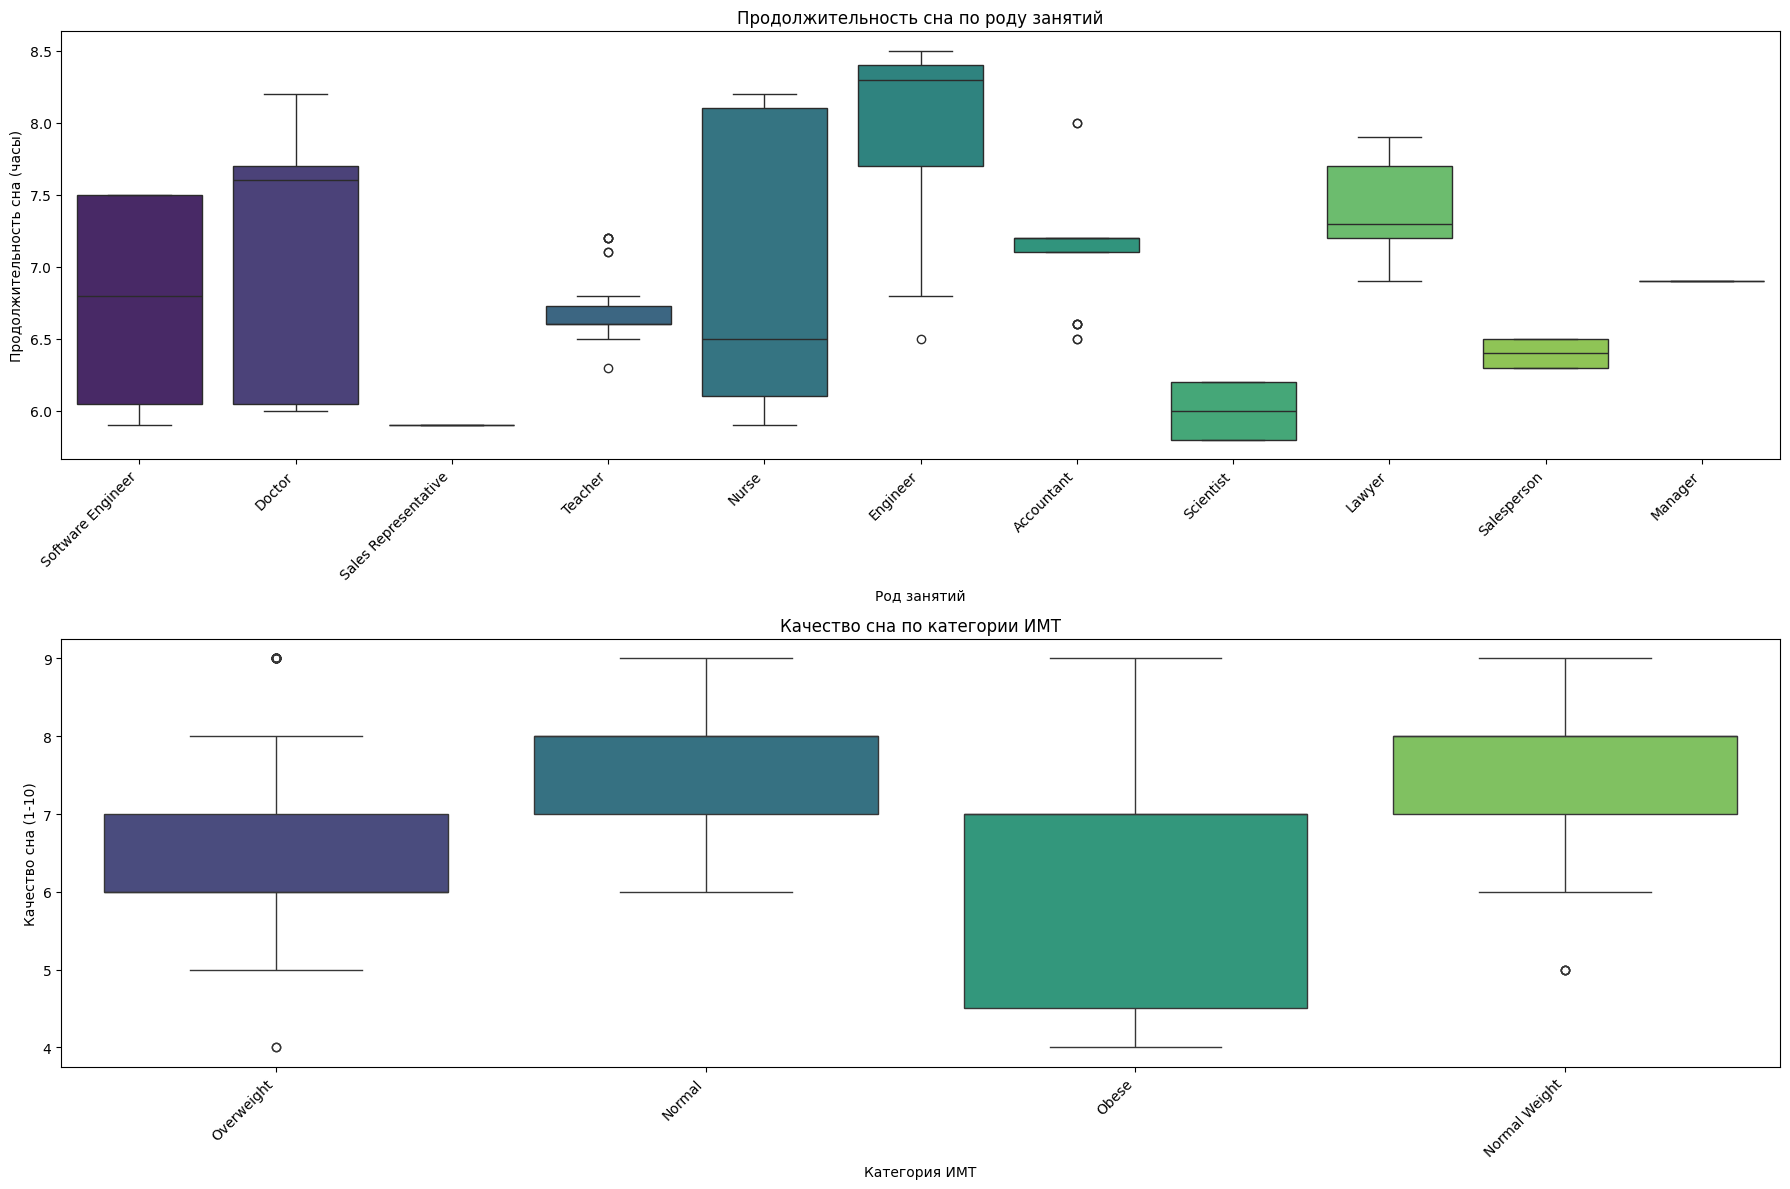

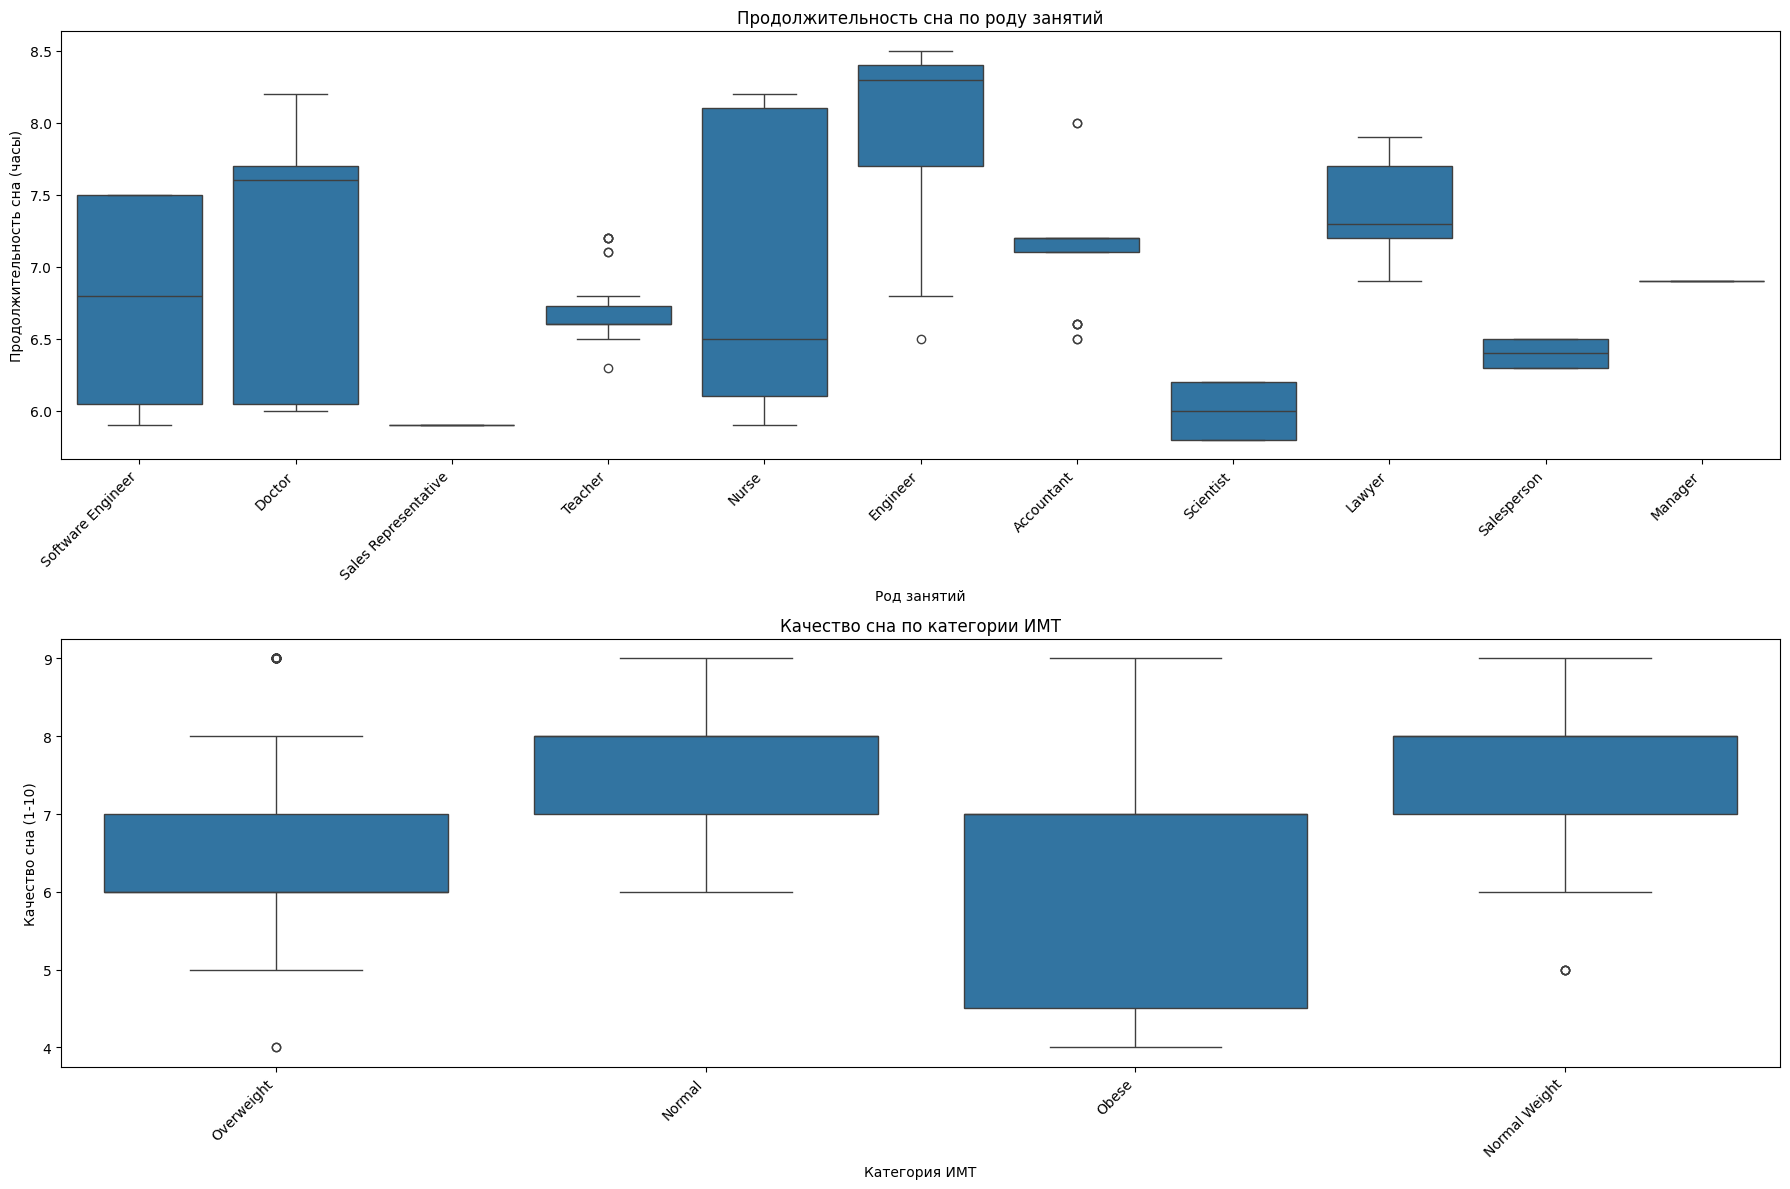

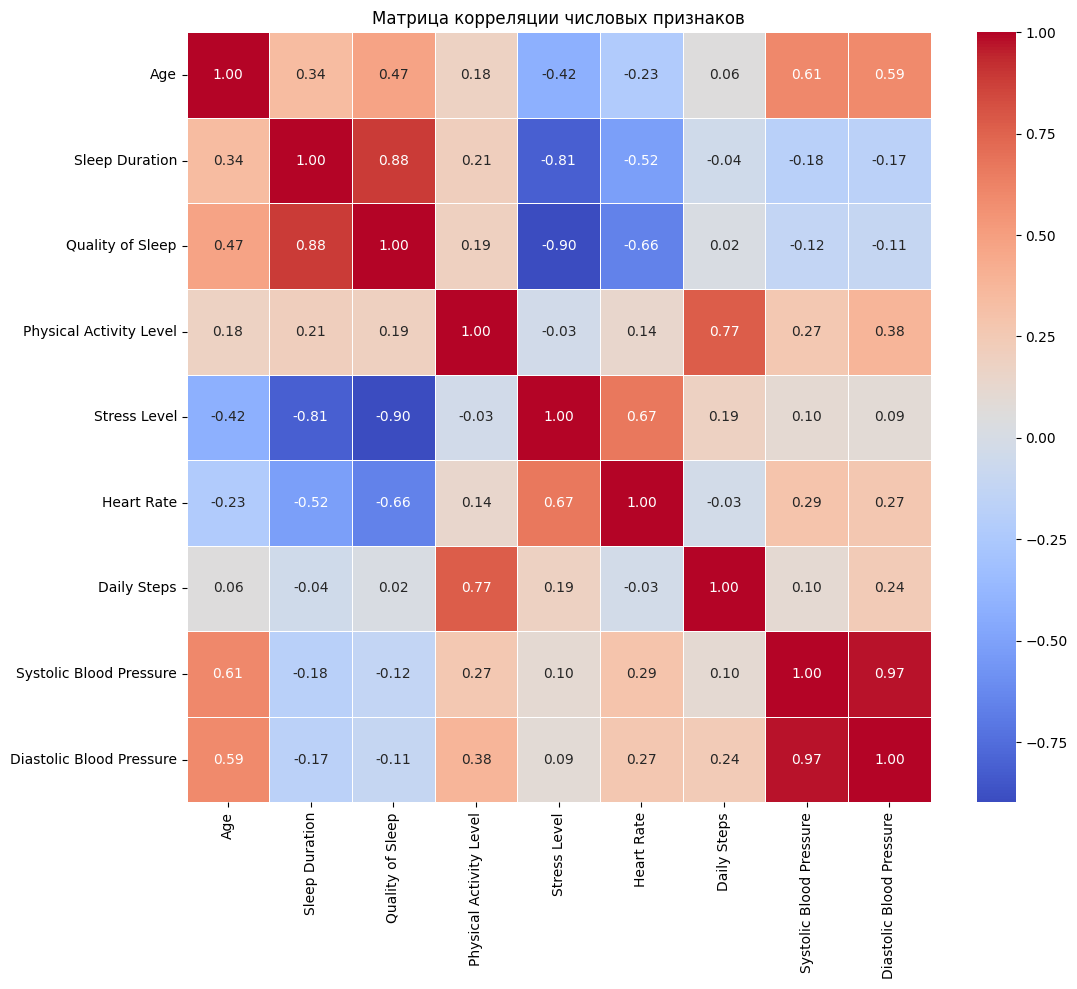

Группировки и агрегации
Агрегированные данные по роду занятий и полу
                            Sleep Duration                      \
                                      mean median count    sum   
Occupation           Gender                                      
Accountant           Female       7.111111   7.20    36  256.0   
                     Male         7.200000   7.20     1    7.2   
Doctor               Female       8.200000   8.20     2   16.4   
                     Male         6.934783   7.30    69  478.5   
Engineer             Female       8.425000   8.40    32  269.6   
                     Male         7.535484   7.70    31  233.6   
Lawyer               Female       7.150000   7.15     2   14.3   
                     Male         7.422222   7.30    45  334.0   
Manager              Female       6.900000   6.90     1    6.9   
Nurse                Female       7.063014   6.50    73  515.6   
Sales Representative Male         5.900000   5.90     2   11.8   
Salespe

In [17]:
import pandas as pd

df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

print("Первые 5 строк датафрейма:")
print(df.head())

print("Последние 5 строк датафрейма:")
print(df.tail())

print("Информация о датафрейме:")
df.info()

df[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

df = df.drop('Blood Pressure', axis=1)

print("Количество пропущенных значений до обработки:")
print(df.isnull().sum())

df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

print("Количество пропущенных значений после обработки:")
print(df.isnull().sum())

print("Количество дубликатов:", df.duplicated().sum())

df_initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
df_rows_after_dedup = df.shape[0]

print("Количество удаленных дубликатов:", df_initial_rows - df_rows_after_dedup)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'Person ID' in numerical_cols:
    numerical_cols.remove('Person ID')

print("Идентифицированные числовые столбцы:", numerical_cols)

for col in numerical_cols:
    df[f'{col}_Zscore'] = np.abs((df[col] - df[col].mean()) / df[col].std())

z_score_threshold = 3

outliers_detected = False
for col in numerical_cols:
    outliers = df[df[f'{col}_Zscore'] > z_score_threshold]
    if not outliers.empty:
        print(f"Выбросы обнаружены в '{col}' (Z-оценка > {z_score_threshold}):")
        print(outliers[['Person ID', col, f'{col}_Zscore']].sort_values(by=f'{col}_Zscore', ascending=False).head())
        outliers_detected = True

if not outliers_detected:
    print(f"Выбросы (Z-оценка > {z_score_threshold}) не обнаружены.")

num_plots = len(numerical_cols)
num_cols_per_row = 3
num_rows = (num_plots + num_cols_per_row - 1) // num_cols_per_row

plt.figure(figsize=(num_cols_per_row * 5, num_rows * 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Ящиковая диаграмма {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

print("Описательная статистика для числовых столбцов:")
print(df.describe())

categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Уникальные значения и частоты для категориальных столбцов:")
for col in categorical_cols:
    print(f"Столбец: {col}")
    print(df[col].value_counts())

numerical_cols_for_corr = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_corr = [col for col in numerical_cols_for_corr if '_Zscore' not in col]
if 'Person ID' in numerical_cols_for_corr:
    numerical_cols_for_corr.remove('Person ID')

correlation_matrix = df[numerical_cols_for_corr].corr()

print("Матрица корреляции для числовых признаков:")
print(correlation_matrix)

numerical_cols_hist = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_hist):
    plt.subplot(2, 2, i + 1) # 2 rows, 2 columns layout
    sns.histplot(df[col], kde=True)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Sleep Duration', data=df)
plt.title('Продолжительность сна в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Продолжительность сна (часы)')
plt.grid(True)
plt.show()

categorical_cols_bar = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols_bar):
    plt.subplot(2, 2, i + 1) # 2 rows, 2 columns layout
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Распределение частот для {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

categorical_cols_bar = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols_bar):
    plt.subplot(2, 2, i + 1) # 2 rows, 2 columns layout
    sns.countplot(data=df, x=col)
    plt.title(f'Распределение частот для {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 12))

plt.subplot(2, 1, 1) # 2 rows, 1 column layout
sns.boxplot(data=df, x='Occupation', y='Sleep Duration', palette='viridis')
plt.title('Продолжительность сна по роду занятий')
plt.xlabel('Род занятий')
plt.ylabel('Продолжительность сна (часы)')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 1, 2) # 2 rows, 1 column layout
sns.boxplot(data=df, x='BMI Category', y='Quality of Sleep', palette='viridis')
plt.title('Качество сна по категории ИМТ')
plt.xlabel('Категория ИМТ')
plt.ylabel('Качество сна (1-10)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 12))

plt.subplot(2, 1, 1) # 2 rows, 1 column layout
sns.boxplot(data=df, x='Occupation', y='Sleep Duration')
plt.title('Продолжительность сна по роду занятий')
plt.xlabel('Род занятий')
plt.ylabel('Продолжительность сна (часы)')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 1, 2) # 2 rows, 1 column layout
sns.boxplot(data=df, x='BMI Category', y='Quality of Sleep')
plt.title('Качество сна по категории ИМТ')
plt.xlabel('Категория ИМТ')
plt.ylabel('Качество сна (1-10)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица корреляции числовых признаков')
plt.show()

print("Группировки и агрегации")

categorical_cols_group = ['Occupation', 'Gender']
numerical_cols_aggregate = ['Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Daily Steps']

aggregated_data = df.groupby(categorical_cols_group)[numerical_cols_aggregate].agg(['mean', 'median', 'count', 'sum'])

print("Агрегированные данные по роду занятий и полу")
print(aggregated_data)

pivot_table = df.pivot_table(index='Occupation', columns='Gender', values='Sleep Duration', aggfunc='mean')

print("Сводная таблица средней продолжительности сна по роду занятий и полу")
print(pivot_table)